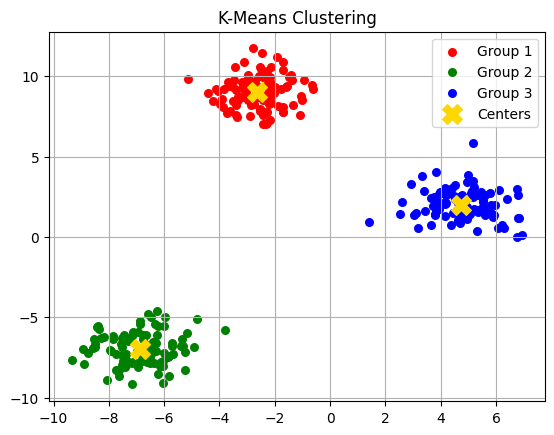

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, random_state=42)

def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def run_kmeans(data, k=3, max_iter=100, threshold=1e-4):
    np.random.seed(42)
    initial = np.random.choice(len(data), k, replace=False)
    centers = data[initial]

    for _ in range(max_iter):
        groups = [[] for _ in range(k)]
        for item in data:
            idx = np.argmin([distance(item, center) for center in centers])
            groups[idx].append(item)
        updated = np.array([np.mean(group, axis=0) if group else centers[i] for i, group in enumerate(groups)])
        if np.linalg.norm(updated - centers) < threshold:
            break
        centers = updated

    result = np.zeros(len(data))
    for i, group in enumerate(groups):
        for item in group:
            index = np.where((data == item).all(axis=1))[0][0]
            result[index] = i

    return centers, result

k = 3
final_centers, cluster_labels = run_kmeans(X, k)

palette = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X[cluster_labels == i][:, 0], X[cluster_labels == i][:, 1], s=30, color=palette[i], label=f"Group {i+1}")
plt.scatter(final_centers[:, 0], final_centers[:, 1], s=200, c='gold', marker='X', label='Centers')
plt.title("K-Means Clustering")
plt.legend()
plt.grid(True)
plt.show()
